### Librerias necesarias con Anaconda:
conda install -c conda-forge google-api-python-client

conda install -c conda-forge googletrans 

### Documentación de perspective, sobre todo ver la lista de modelos. Si usamos Perspective las categorías de la investigación debería adecuarse a estos modelos
https://github.com/conversationai/perspectiveapi/blob/master/api_reference.md

In [11]:
import config

In [12]:
#ejemplos de algunos comments de Clarin
texto = "Y LAS RATAS KK SIGUEN PENSANDO QUE EL KIRSCHNERISMO VA A VOLVER........COSTARA MUCHISIMO SALIR DE ESTO, PERO LOS KK NUNCA MAS...."
texto2= "che clarin dejalo tranquilo al ple0tudo de gamurra no lo hagas laburar tanto jajajajaja"
texto3= "CLARIN UN DIARIO INMUNDO, IGUAL QUE ESTE GOBIERNO\
 UN DIARIO QUE LOS NEGROS IGNORANTES DE ESTE PAÍS UTILIZAN PARA LIMPIARSE EL CUULO...\
 UN DIARIO QUE EL GRUPO CLARIN USA PARA EXTORSIONAR Y COIMEAR A LOS GOBIERNOS Y DESPUÉS HACER NEGOCIOS\
 CON UNA PAUTA MILLONARÍA EN DÓLARES Y SESENTA NICK'S TRUCHOS SE ENCARGAN DE LINCHAR A LOS CIUDADANOS QUE LES MOLESTAN...\
                             DECIME EN QUE NACIÓN DEL MUNDO... \
                       EN QUÉ PAIS DE AFRICA OCURRE ALGO IGUAL"
texto4 = 'QUE LE paso a Macri? Nadie invierte 150dolares para perder. que alguien saque la cuenta si conviene vender y poner a interese en en BNACION A VER si conviene o no....que desilusion!'

### En muchos casa los "comentaristas" (trolls) usan entrategias para zafar la censura, habría que ver como preprocesar esto, ejemplos:

Solo lei la " Araña" y me imagine hablaba de la c0ncha p.uta de Cristina Fernandez de Kirchner

che clarin dejalo tranquilo al ple0tudo de gamurra no lo hagas laburar tanto jajajajaja


In [13]:
#Para el caso de querer traducir:

#from googletrans import Translator
#translator = Translator()
#traduccion = translator.translate(texto3).text
#print(traduccion)

In [14]:
from googleapiclient import discovery
import json

API_KEY= config.perspectiveAPI_KEY #Toni

service = discovery.build('commentanalyzer', 'v1alpha1', developerKey=API_KEY)

Modulos que funcionan en español:
TOXICITY_EXPERIMENTAL
SEVERE_TOXICITY_EXPERIMENTAL
IDENTITY_ATTACK_EXPERIMENTAL
INSULT_EXPERIMENTAL
PROFANITY_EXPERIMENTAL
THREAT_EXPERIMENTAL

In [15]:
analyze_request = {
  'comment': { 'text': texto2 },
  'requestedAttributes': {'TOXICITY_EXPERIMENTAL': {}, 
                          'SEVERE_TOXICITY_EXPERIMENTAL':{},
                          'IDENTITY_ATTACK_EXPERIMENTAL':{},
                          'PROFANITY_EXPERIMENTAL':{},
                          'THREAT_EXPERIMENTAL':{},
                          'INSULT_EXPERIMENTAL':{}
                         }
}

response = service.comments().analyze(body=analyze_request).execute()

print (json.dumps(response, indent=2))

{
  "attributeScores": {
    "TOXICITY_EXPERIMENTAL": {
      "spanScores": [
        {
          "begin": 0,
          "end": 87,
          "score": {
            "value": 0.19863188,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.19863188,
        "type": "PROBABILITY"
      }
    },
    "SEVERE_TOXICITY_EXPERIMENTAL": {
      "spanScores": [
        {
          "begin": 0,
          "end": 87,
          "score": {
            "value": 0.12493445,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.12493445,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "es"
  ]
}


In [9]:
analyze_request = {
  'comment': { 'text': texto4 },
  'requestedAttributes': {'TOXICITY_EXPERIMENTAL': {}, 
                          'SEVERE_TOXICITY_EXPERIMENTAL':{},
                          'PROFANITY_EXPERIMENTAL':{},
                          'THREAT_EXPERIMENTAL':{},
                          'INSULT_EXPERIMENTAL':{}
                         }
}

response = service.comments().analyze(body=analyze_request).execute()

print (json.dumps(response, indent=2))

{
  "attributeScores": {
    "SEVERE_TOXICITY_EXPERIMENTAL": {
      "spanScores": [
        {
          "begin": 0,
          "end": 181,
          "score": {
            "value": 0.085778356,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.085778356,
        "type": "PROBABILITY"
      }
    },
    "TOXICITY_EXPERIMENTAL": {
      "spanScores": [
        {
          "begin": 0,
          "end": 181,
          "score": {
            "value": 0.13242681,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.13242681,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "es"
  ]
}


In [14]:
response['attributeScores']['TOXICITY_EXPERIMENTAL']['summaryScore']['value']

{'spanScores': [{'begin': 0,
   'end': 181,
   'score': {'type': 'PROBABILITY', 'value': 0.13242681}}],
 'summaryScore': {'type': 'PROBABILITY', 'value': 0.13242681}}

In [17]:
response['attributeScores']['SEVERE_TOXICITY_EXPERIMENTAL']['summaryScore']['value']

0.085778356

In [50]:
import pandas as pd
df = pd.read_csv('./data/commentarios_lanacion.csv', index_col= 0)

In [51]:
import numpy as np
def analizar(comentarios):
    resultados = []
    for comentario in tqdm(comentarios):
        resultado = {}
        try:
            analyze_request = {
                            'comment': { 'text': comentario },
                            'requestedAttributes': {'TOXICITY_EXPERIMENTAL': {}, 
                                                      'SEVERE_TOXICITY_EXPERIMENTAL':{}}}
            response = service.comments().analyze(body=analyze_request).execute()
            
            resultado['comment'] = comentario
            resultado['toxicity'] =response['attributeScores']['TOXICITY_EXPERIMENTAL']['summaryScore']['value']
            resultado['severe_toxicity'] = response['attributeScores']['SEVERE_TOXICITY_EXPERIMENTAL']['summaryScore']['value']
            resultados.append(resultado)
        except:
            resultado['comment'] = comentario
            resultado['toxicity'] = np.nan
            resultado['severe_toxicity'] = np.nan
            resultados.append(resultado)
    return resultados     

In [52]:
from joblib import Parallel, delayed

In [53]:
from tqdm import tqdm,tqdm_notebook

In [54]:
df = df.sample(5000)

In [55]:
lista_comentarios =np.array_split(df.texto, 4)

In [30]:
tqdm_notebook(analizar(df.texto[:5]))

A Jupyter Widget

A Jupyter Widget

0/|/  0%|| 0/5 [00:00<?, ?it/s]

In [56]:
%%time
results = Parallel(n_jobs=-1)(delayed(analizar)(comentarios) for comentarios in lista_comentarios)

Wall time: 4min 14s


In [57]:
results = results[0] +results[1] +results[2] +results[3]

In [58]:
resultados = df.merge(pd.DataFrame(results), how = 'left', left_on='texto', right_on='comment')

In [74]:
resultados.groupby('seccion').median()

,likes,respuestas,es_respuesta,severe_toxicity,toxicity
seccion,,,,,
Deportes,2.0,0,0.0,0.094147,0.179567
Economía,2.0,0,0.5,0.112968,0.186544
El Mundo,2.0,0,0.0,0.146316,0.217844
Espectáculos,3.5,0,0.0,0.100597,0.178148
Política,2.0,0,0.0,0.147536,0.225484
Sociedad,2.0,0,0.0,0.140561,0.198632


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

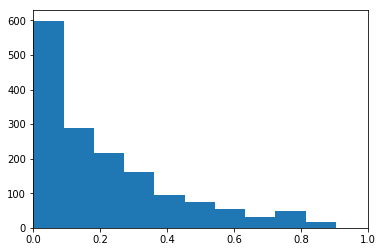

In [83]:
plt.xlim(0,1)
plt.hist(resultados.loc[resultados.seccion == 'Política'].severe_toxicity.dropna());

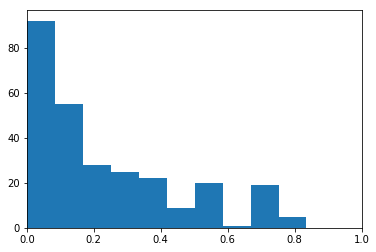

In [84]:
plt.xlim(0,1)
plt.hist(resultados.loc[resultados.seccion == 'El Mundo'].severe_toxicity.dropna());

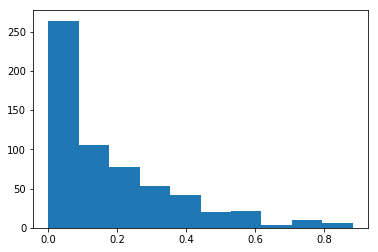

In [85]:
plt.hist(resultados.loc[resultados.seccion == 'Economía'].severe_toxicity.dropna());

In [90]:
[x for x in resultados.sort_values(by='severe_toxicity', ascending = False).comment]

['@fper7709 @iaderf QUE SE TE MUERA UN HIJO A VOS TAMBIÉN',
 '@lucasvas @Sebastian1976 yo creo que es argentino, hijo de turcos',
 '@Italiener67 vos sos reconocido por uruguayo basura, trepador, alcahuete',
 'Te falta la diéresis. Bruta ignorantre. Sos tan fina como un canapé de polenta.\r\r\r\r\r\r\r\r\r\nLo más parecido q tenes a un francés es el mal olor.',
 '@el_pulento @vicente_roth @juansanfer @lsmi2504 @fedeacade Lago del Desierto es territorio argentino, te metiste y te sacaron a tiros, tampoco tuviste eggs para reclamar un trapo, no estas en condiciones de habladr de dignidad.',
 '@Italiener67\r\r\r\r\r\r\r\r\r\nCALLATE PIQUE TERO TRU CHO.\r\r\r\r\r\r\r\r\r\nEN VEZ DE HACER UNA OLLA POPULAR TlRA EL FlDEO',
 'A estos tipos habría que aplicarles sanciones ejemplarizantes , generan violencia con sus actitudes y después se golpean el pecho y hacen gárgaras contra la violencia.',
 '@gguasoncito1 @Italiener67 Vos sos putamaro y te lo respetamos Guasón.',
 'LADRONA devolve la plata q